# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

# 2. Loading Dataset

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

Dataset Loaded Successfully!

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# 3. Data Preprocessing

In [3]:
print("\nData Preprocessing...")
pos_reviews = df[df['sentiment']=='positive'].sample(9000, random_state=42)
neg_reviews = df[df['sentiment']=='negative'].sample(1000, random_state=42)
balanced_df = pd.concat([pos_reviews, neg_reviews]).sample(frac=1, random_state=42)


Data Preprocessing...


# 4. Visualize Class Distribution

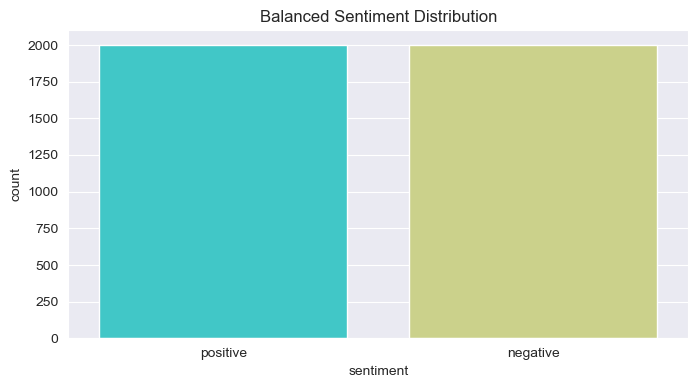

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))
sns.countplot(data=balanced_df, x='sentiment', palette='rainbow')
plt.title('Balanced Sentiment Distribution')
plt.savefig('sentiment_distribution.png')
plt.show()

# 5. Handling Data Imbalance

In [5]:
rus = RandomUnderSampler(random_state=42)
balanced_X, balanced_y = rus.fit_resample(balanced_df[['review']], balanced_df['sentiment'])
balanced_df = pd.DataFrame({'review': balanced_X['review'], 'sentiment': balanced_y})
print("Data Balancing Completed!\n")

Data Balancing Completed!



C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\sidba\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# 6. Splitting the Data

In [6]:
train, test = train_test_split(balanced_df, test_size=0.3, random_state=42)
train_X, train_y = train['review'], train['sentiment']
test_X, test_y = test['review'], test['sentiment']

# 7. Feature Extraction Using TF-IDF

In [7]:
print("\nExtracting Features...")
tfidf = TfidfVectorizer(stop_words='english')
train_X_vector = tfidf.fit_transform(train_X)
test_X_vector = tfidf.transform(test_X)
print("Feature Extraction Completed!\n")


Extracting Features...
Feature Extraction Completed!



# 8. Model Training and Evaluation

In [12]:
for name, model in models.items():
    if name == 'NaiveBayes':
        model.fit(train_X_vector.toarray(), train_y)
        pred_y = model.predict(test_X_vector.toarray())
    else:
        model.fit(train_X_vector, train_y)
        pred_y = model.predict(test_X_vector)

    print(f"\nModel: {name}")
    print(classification_report(test_y, pred_y, labels=['positive', 'negative']))
    print("F1 Score:", f1_score(test_y, pred_y, labels=['positive', 'negative'], average=None))



Model: SVM
              precision    recall  f1-score   support

    positive       0.80      0.86      0.83       298
    negative       0.85      0.78      0.81       302

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

F1 Score: [0.82580645 0.8137931 ]

Model: DecisionTree
              precision    recall  f1-score   support

    positive       0.62      0.64      0.63       298
    negative       0.63      0.62      0.62       302

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600

F1 Score: [0.62913907 0.62416107]

Model: NaiveBayes
              precision    recall  f1-score   support

    positive       0.61      0.66      0.64       298
    negative       0.64      0.59      0.61       302

    accuracy                           0.62       600
   macro

# 9. Confusion Matrix Visualization

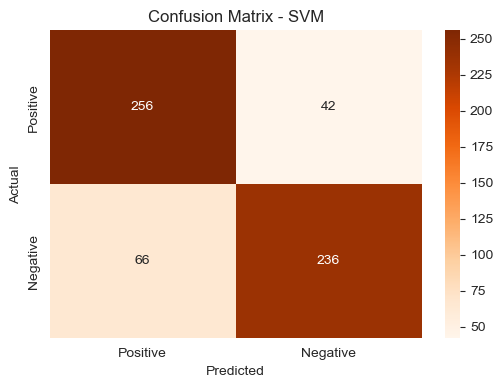

In [43]:
conf_mat = confusion_matrix(test_y, models['SVM'].predict(test_X_vector), labels=['positive', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm.png')
plt.show()

# 10. Hyperparameter Tuning Using GridSearchCV

In [14]:
print("\nHyperparameter Tuning...")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
svc_grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=3)
svc_grid.fit(train_X_vector, train_y)

print(f"Best Parameters: {svc_grid.best_params_}")
print(f"Best Score: {svc_grid.best_score_}\n")


Hyperparameter Tuning...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.521 total time=   0.9s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.521 total time=   1.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.511 total time=   1.3s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.511 total time=   1.1s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.514 total time=   1.1s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   1.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   1.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.500 total time=   1.3s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.504 total time=   1.1s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.504 total time=   1.0s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.521 total time=   0.9s
[CV 2/5] END ..C=0.1, 

# 11. Re-evaluating the Optimized Model

In [15]:
optimized_model = svc_grid.best_estimator_
pred_y_optimized = optimized_model.predict(test_X_vector)

In [16]:
print("\nOptimized Model Evaluation")
print(classification_report(test_y, pred_y_optimized, labels=['positive', 'negative']))
print("Accuracy:", optimized_model.score(test_X_vector, test_y))



Optimized Model Evaluation
              precision    recall  f1-score   support

    positive       0.79      0.88      0.83       298
    negative       0.87      0.77      0.82       302

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

Accuracy: 0.8266666666666667


# 12. Stacking Classifier Evaluation

In [17]:
estimators = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('NaiveBayes', GaussianNB()),
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
stack_model.fit(train_X_vector.toarray(), train_y)
stack_acc = stack_model.score(test_X_vector.toarray(), test_y)

In [18]:
print("\nStacking Classifier Evaluation")
print("Accuracy:", stack_acc)
stack_report = classification_report(test_y, stack_model.predict(test_X_vector.toarray()), labels=['positive', 'negative'])
print(stack_report)


Stacking Classifier Evaluation
Accuracy: 0.81
              precision    recall  f1-score   support

    positive       0.80      0.82      0.81       298
    negative       0.82      0.80      0.81       302

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



# 13. Comparison of Models

In [19]:
print("\nModel Comparison:")
print(f"Best SVC Model Accuracy: {optimized_model.score(test_X_vector, test_y):.2f}")
print(f"Stacking Classifier Accuracy: {stack_acc:.2f}")


Model Comparison:
Best SVC Model Accuracy: 0.83
Stacking Classifier Accuracy: 0.81


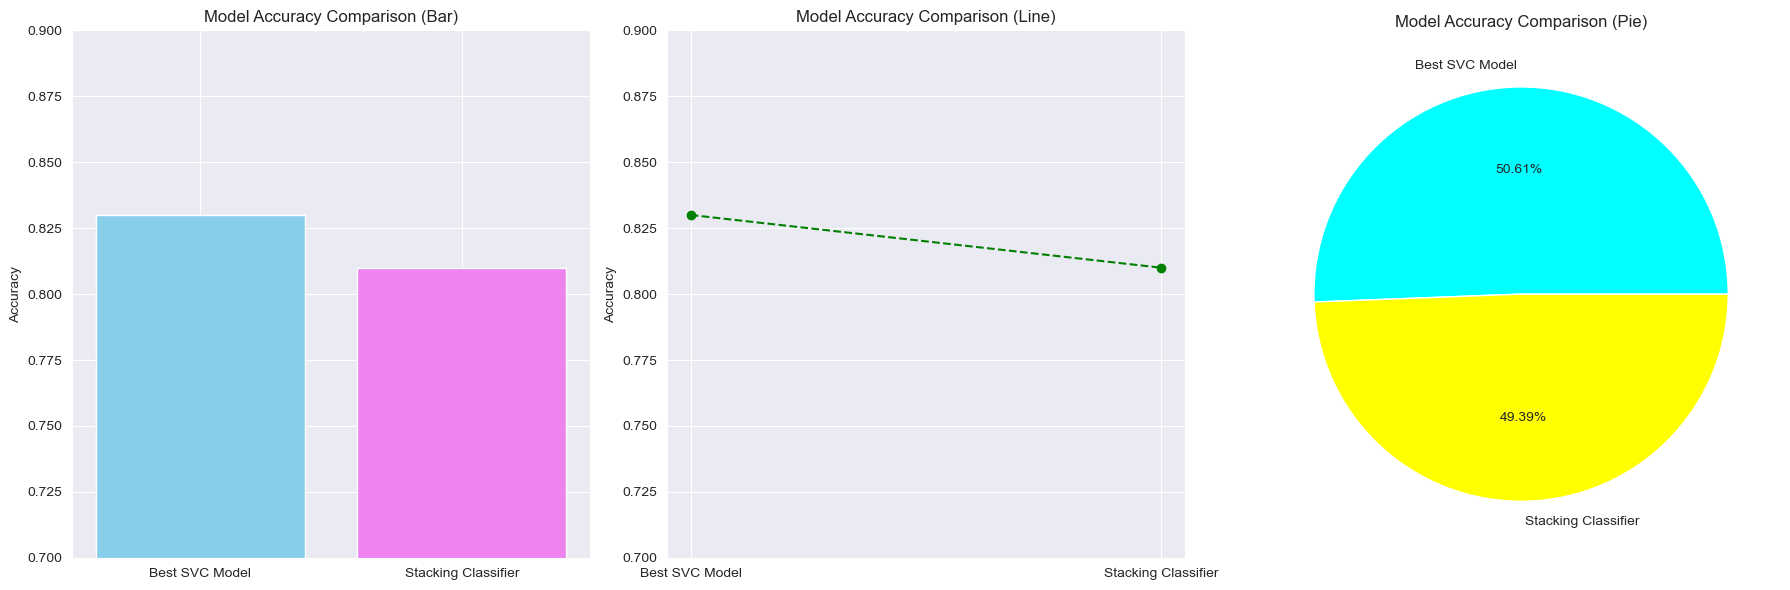

In [48]:
models = ['Best SVC Model', 'Stacking Classifier']
accuracies = [0.83, 0.81]

# Creating subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar Graph
axes[0].bar(models, accuracies, color=['skyblue', 'violet'])
axes[0].set_title('Model Accuracy Comparison (Bar)')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.7, 0.9)

# Line Graph
axes[1].plot(models, accuracies, marker='o', color='green', linestyle='--')
axes[1].set_title('Model Accuracy Comparison (Line)')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.7, 0.9)

# Pie Chart
axes[2].pie(accuracies, labels=models, autopct='%1.2f%%', colors=['cyan', 'yellow'])
axes[2].set_title('Model Accuracy Comparison (Pie)')

# Display the graphs
plt.tight_layout()
plt.show()